In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import scipy.stats as stats

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords


import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('data.csv').drop('Unnamed: 0', axis = 1)

In [15]:
no_text_idx = data[data.text.isna()].index

In [16]:
with_text = data.drop(index = no_text_idx)

In [17]:
with_text['text']

,author,date,text,n_likes,n_reposts,with_photo,is_repost?
0,dying,17 авг 2015,хочу видеть тебя каждый день,14351,325,False,False
1,dying,17 авг 2015,"Живёшь живёшь, и тут в твоей жизни появляется ...",7098,144,False,False
2,dying,17 авг 2015,- По кому скучаешь?\n- По Наташе,6439,121,False,False
3,dying,17 авг 2015,"и дай Бог каждому быть с тем, с кем сердце не ...",8469,221,False,False
4,dying,17 авг 2015,Моя Арина милашка\nМоя Арина бандитка\nМоя Ари...,3704,71,False,False
...,...,...,...,...,...,...,...
9984,dying,30 окт 2014,"- Как тебя Земля носит?\n- Ну, гравитация и ты...",263,7,False,False
9985,dying,30 окт 2014,сохрани нежность,67,0,False,False
9986,dying,30 окт 2014,"Если у тебя на лице прыщики, не комплексуй. По...",133,4,False,False
9987,dying,30 окт 2014,"- Вы такая милая пара! Когда я вас вижу, вы вс...",636,12,False,False


In [18]:
from string import punctuation

In [19]:
!pip install pymystem3


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
with_text['text'] = with_text['text'].apply(lambda x: ' '.join(x.split('\n')))

In [32]:
with_text.reset_index(inplace = True)

In [35]:
with_text.drop('index', axis = 1, inplace = True)

Лемматизация

In [24]:
from pymystem3 import Mystem

mystem_analyzer = Mystem()

Installing mystem to C:\Users\inoke/.local/bin\mystem.exe from http://download.cdn.yandex.net/mystem/mystem-3.1-win-64bit.zip


Не трогайте ячейку ниже, она отрабатывалась полтора часа)

In [43]:
with_text['text'] = with_text['text'].apply(lambda x: ' '.join(mystem_analyzer.lemmatize(x)[:-1]))

In [45]:
with_text.to_csv('lemmatized.csv')

In [46]:
with_text

,author,date,text,n_likes,n_reposts,with_photo,is_repost?
0,dying,17 авг 2015,хотеть видеть ты каждый день,14351,325,False,False
1,dying,17 авг 2015,"жить жить , и тут в твой жизнь по...",7098,144,False,False
2,dying,17 авг 2015,- по кто скучать ? - по наташа,6439,121,False,False
3,dying,17 авг 2015,"и давать бог каждый быть с то , с...",8469,221,False,False
4,dying,17 авг 2015,мой арина милашка мой арина бандитка...,3704,71,False,False
...,...,...,...,...,...,...,...
9804,dying,30 окт 2014,"- как ты земля носить ? - ну , грави...",263,7,False,False
9805,dying,30 окт 2014,сохранять нежность,67,0,False,False
9806,dying,30 окт 2014,"если у ты на лицо прыщик , не ком...",133,4,False,False
9807,dying,30 окт 2014,- вы такой милый пара ! когда я вы...,636,12,False,False


In [52]:
with_text.text[214]

'подруга  -  это   святой !  особенно ,  если   она   звать   леся'

In [57]:
nltk.download("punkt", quiet=True)
nltk.download("stopwords", quiet=True)

True

Избавимся от пунктуации и стоп-слов в тексте.

In [70]:
noise = set(stopwords.words('russian') + stopwords.words('english') + list(punctuation))

In [198]:
def stopwords_dropper(string):
    noise = set(stopwords.words('russian') + stopwords.words('english') + list(punctuation + '—–'))  
    
    text = string.split() # лемматизатор уже отделил всю пунктуацию пробелами
    out = []
    
    for word in text:
        if word in noise:
            continue
        else:
            out.append(word)
            
    return ' '.join(out)

In [199]:
wo_stopwords = with_text['text'].apply(stopwords_dropper)

In [200]:
data_no_stopwords = with_text[['author', 'date', 'n_likes', 'n_reposts', 'with_photo', 'is_repost?']]

In [201]:
data_no_stopwords['text'] = wo_stopwords

In [239]:
all_words = np.array([])
for i in data_no_stopwords.text:
    words = i.split()
    all_words = np.append(all_words, words)
    
words, counts = list(map(list, np.unique(all_words, return_counts= True))) 

word_counter = []
for i, j in zip(words, counts):
    word_counter.append([i, j])

Посмотрим на самые часто встречающиеся слова в постах

In [243]:
most_10 = dict(sorted(word_counter, key = lambda x: x[1], reverse=True)[:10])

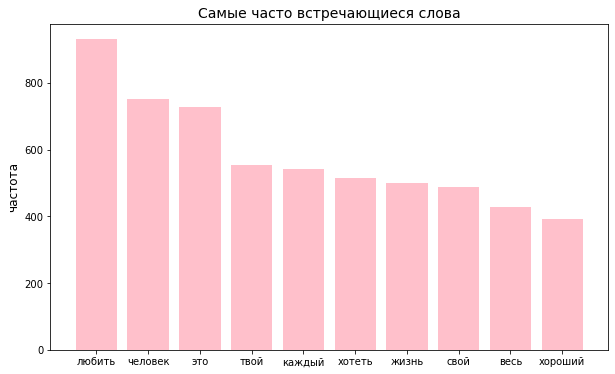

In [244]:
plt.figure(figsize=(10, 6))
plt.bar(most_10.keys(), height=most_10.values(), color = 'pink')
plt.ylabel('частота', fontsize = 12)
plt.title('Самые часто встречающиеся слова', fontsize = 14);

In [224]:
x = list(most_10.keys()

In [246]:
def is_loved(string: str):
    if 'любить' in string:
        return 1
    else: 
        return 0 

In [248]:
data_no_stopwords['with_love'] = data_no_stopwords.text.apply(is_loved)

In [252]:
loved = data_no_stopwords[data_no_stopwords['with_love'] == 1]
not_loved = data_no_stopwords[data_no_stopwords['with_love'] == 0]

Проверим гипотезу о том, что посты со словом __*любить*__ набирают больше лайков.

$$
H_0: \mu_{loved} = \mu_{not\_loved}\\
$$
$$
H_1: \mu_{loved} > \mu_{not\_loved}
$$

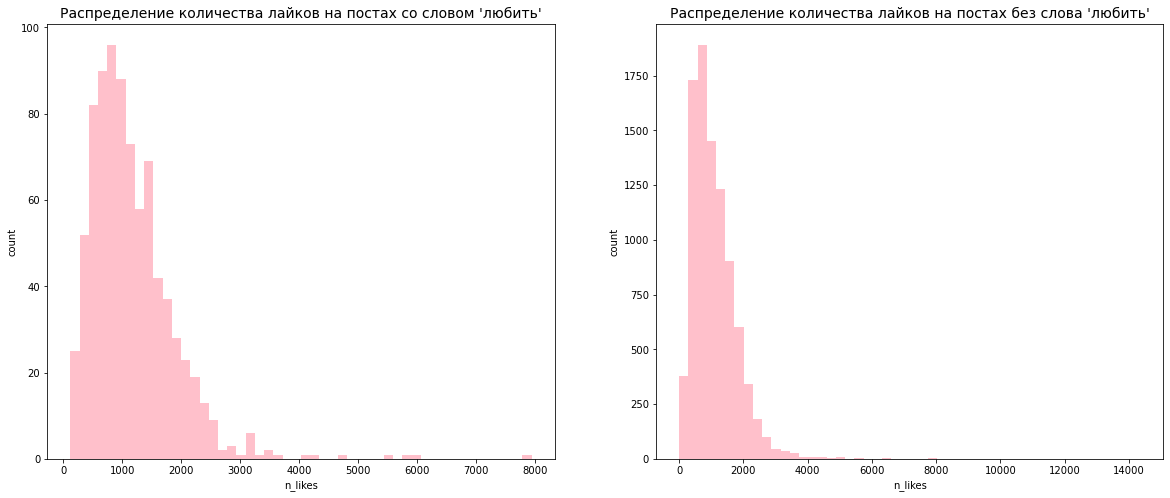

In [367]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (20, 8))

ax[0].hist(loved.n_likes, bins = 50, color = 'pink')
ax[0].set_xlabel('n_likes')
ax[0].set_ylabel('count')
ax[0].set_title("Распределение количества лайков на постах со словом 'любить'" , fontsize = 14)

ax[1].hist(not_loved.n_likes, bins = 50, color = 'pink')
ax[1].set_xlabel('n_likes')
ax[1].set_ylabel('count')
ax[1].set_title("Распределение количества лайков на постах без слова 'любить'" , fontsize = 14);

Среднее количество лайков будет асимптотически нормальным (по ЦПТ), дисперсии количества лайков в каждой группе мы не знаем, поэтому для проверки гипотезы будем использовать тест Уэлча

In [286]:
stats.ttest_ind(loved.n_likes, not_loved.n_likes, equal_var= False, alternative= 'greater')

Ttest_indResult(statistic=2.5453997328112554, pvalue=0.005533439306832869)

Полученное p-значение меньше, чем наиболее часто используемые уровни значимости. Нулевая гипотеза отвергается на уровне значимости 0.01, значит мы можем говорить, что посты со словом __*любить*__ в среднем набирают больше лайков.

Мы также проверям робастность результатов, заменяя количество лайков на количество репостов. Интуитивно, количество репостов, также как и количество лайков отражает отношение пользователей к посту. Обычно, чем больше лайков репостов, тем больше людей, считают текст в посте отражающим их настроение, значимым для них.

In [368]:
stats.ttest_ind(loved.n_reposts, not_loved.n_reposts, equal_var= False, alternative= 'greater')

Ttest_indResult(statistic=6.3989634170860015, pvalue=1.2021955478567185e-10)

С количеством репостов получили аналогичный результат: Подписчики в среднем больше репостят посты со словом __*любить*__, что может говорить о том, 

## Теперь посмотрим на маты

Можно предположить, что в группе, где подписчики больше лайкают посты со словом __*любить*__ нет места негатива и брани. Мы решили изучить этот вопрос, воспользовавшись большим набором матерных слов на русском языке. 

In [354]:
with open('маты.txt', 'r', encoding='utf-8') as file:
    bad_words = set(map(lambda x: x.lower(), file.read().split('\n'))) 

In [355]:
def with_bad_words(string: str):
    words = set(str(string).split())

    if words & bad_words != set():
        return 1
    else:
        return 0

In [356]:
data_no_stopwords['with_bad_words'] = data.text.apply(with_bad_words)

In [357]:
explicit = data_no_stopwords[data_no_stopwords['with_bad_words'] == 1]
no_explicit = data_no_stopwords[data_no_stopwords['with_bad_words'] == 0]

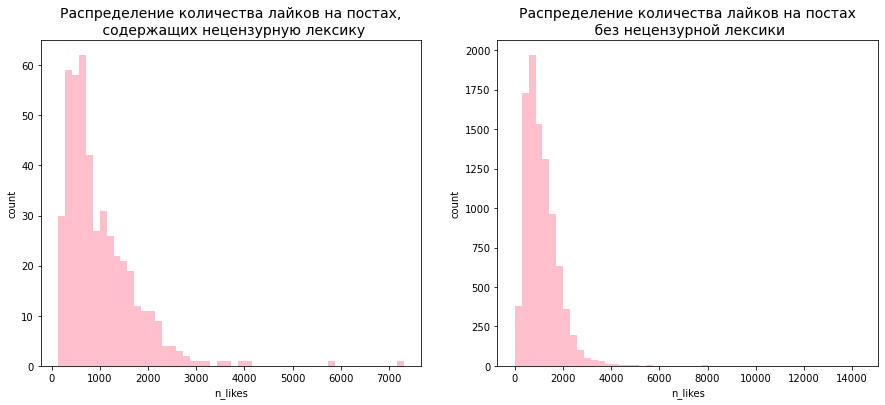

In [358]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize = (15, 6))

ax[0].hist(explicit.n_likes, bins = 50, color = 'pink')
ax[0].set_xlabel('n_likes')
ax[0].set_ylabel('count')
ax[0].set_title("Распределение количества лайков на постах,\n содержащих нецензурную лексику" , fontsize = 14)

ax[1].hist(no_explicit.n_likes, bins = 50, color = 'pink')
ax[1].set_xlabel('n_likes')
ax[1].set_ylabel('count')
ax[1].set_title("Распределение количества лайков на постах\n без нецензурной лексики" , fontsize = 14);

Судя по выборочным средним, посты, содержащие нецензурную лексику в среднем по выборке набирали меньше лайков, чем посты без такой лексики.

In [364]:
explicit.n_likes.mean(), no_explicit.n_likes.mean()

(1010.025974025974, 1110.9155878891622)

Однако, так ли это на самом деле. Мы статистически проверям гипотезу, о том, что посты с матерными словами в среднем набирают меньше лайков

$$
H_0: \mu_{explicit} = \mu_{no\_explicit}\\
$$
$$
H_1: \mu_{explicit} < \mu_{no\_explicit}
$$

Опять же, мы используем тест Уэлча, так как дисперсии неизвестны.

In [360]:
stats.ttest_ind(explicit.n_likes, no_explicit.n_likes, equal_var= False, alternative= 'less')

Ttest_indResult(statistic=-2.7936088435659046, pvalue=0.0027051658282757087)

Полученное p-значение меньше 0.01, а значит нулевая гипотеза отвергается на уровне значимости 0.1%. Можно довольно уверенно говорить о том, что подписчики группы dying не любят посты с нецензурной лексикой!

1110.9155878891622